In [52]:
import pandas.io.data as web
import datetime
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline  

In [53]:
start = datetime.datetime(2012, 1, 1)
end = datetime.datetime(2013, 1, 27)

# Texas Instruments Incorporated (NASDAQ:TXN)
txn = web.DataReader("TXN", 'yahoo', start, end)

# Hormel Foods Corp (NYSE:HRL)
hrl = web.DataReader("HRL", 'yahoo', start, end)

In [54]:
index = web.DataReader("SPY", 'yahoo', start, end)

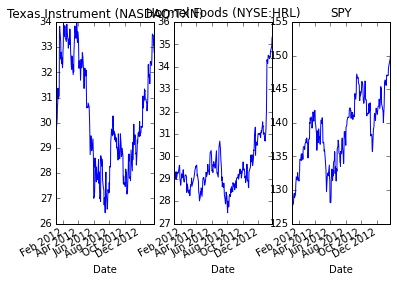

In [55]:
fig, axes = plt.subplots(1,3)

txn['Close'].plot(ax=axes[0])
axes[0].set_title('Texas Instrument (NASDAQ:TXN)')

hrl['Close'].plot(ax=axes[1])
axes[1].set_title('Hormel Foods (NYSE:HRL)')

index['Close'].plot(ax=axes[2])
axes[2].set_title('SPY')

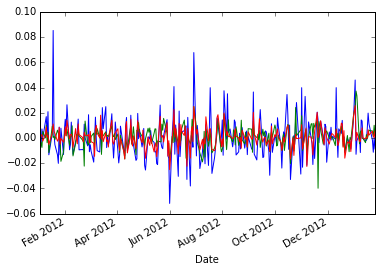

In [59]:
txn['Close'].pct_change().plot()
hrl['Close'].pct_change().plot()
index['Close'].pct_change().plot()

In [67]:
print (txn['Close'].pct_change().corr(index['Close'].pct_change()))
print (hrl['Close'].pct_change().corr(index['Close'].pct_change()))

0.720339034324
0.525501800361
